In [2]:
가장 중요. 딥러닝(선형회귀에서 발전 된것) , 머신러닝의 핵심. y = ax + b
선형 직선함수,예측가능
비선형 곡선함수,선형으로 만들어 사용(미분),
머신러닝에서 for문 = epoch (이팍, 에포크)

딥러닝 : 선형회귀
머신러닝 : 1) 산포도;최근접이웃 가장 쉬운 머신러닝 방법 , 2) tree 구조 , 3) 선형 (인공신경망) 
인공신경망을 구글이 팔아먹을라고 포장한게 딥러닝 , 구글 알파고는 선형회귀 

y = ax + b
y : Target (타겟) , x : Feature (피쳐)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: 예상하지 못한 기호(symbol)입니다.
1: 가장 중요.
       ^


# 회귀 분석 (Regression)
- 데이터를 이용하여 함수식(Y= aX + b)를 구한다.
- 기울기(DL딥러닝: Weight) 와 절편(DL: Bias편견,편향)을 DataSet으로 최적값(y^ , Yhat)을 구한다. (정답과 오차율의 차이가 제일 적은 것으로 선택 --> 인공신경망으로 발전)
- 기울기와 절편으로 Y값을 예측할 수 있다.

### 단순 회귀 분석 : Y = aX + b

In [8]:
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)
str(regression)
summary(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 19 26 31 5 15 18 21 23 25 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12Year     : 1   Mean   :135.8   Mean   :42.62  
 12~18Months: 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

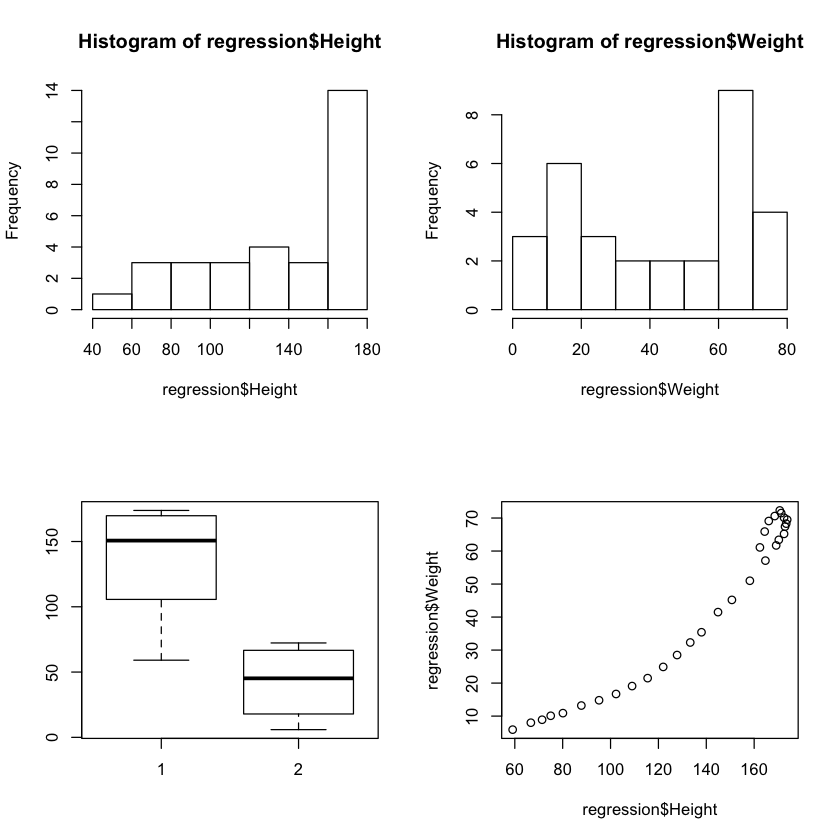

In [21]:
par(mfrow = c(2,2), bg='white')
hist(regression$Height)
hist(regression$Weight)
boxplot(regression$Height, regression$Weight)
plot(regression$Weight ~ regression$Height)

In [14]:
cor(regression$Height, regression$Weight)

[1] 0.9672103

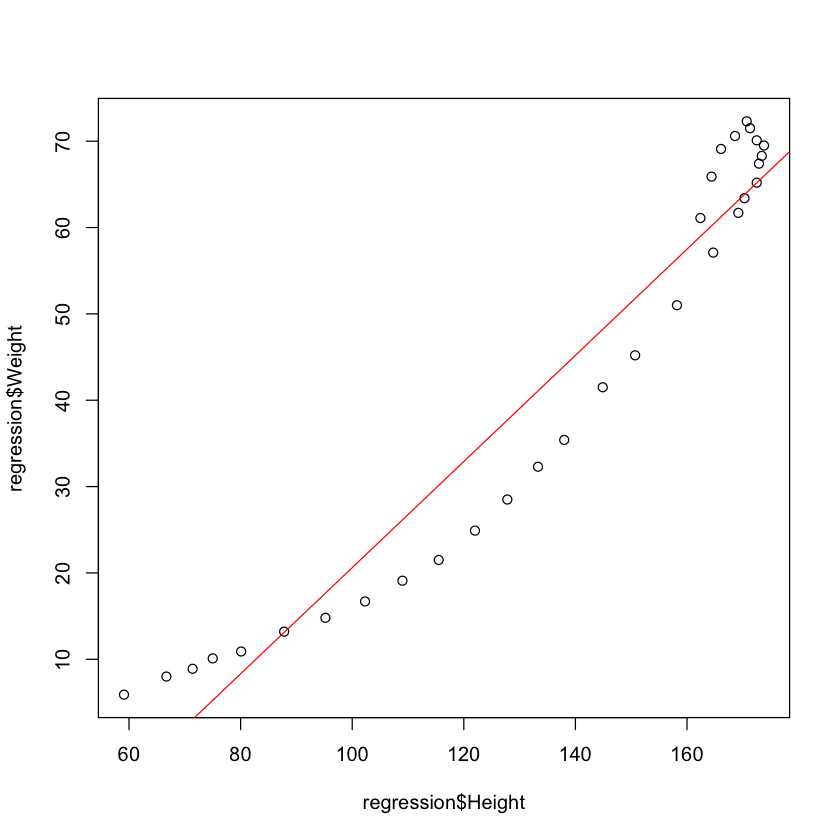

In [25]:
par(bg='white')
plot(regression$Weight ~ regression$Height)

# 회귀선 (중심선, 평균선)
r <- lm(regression$Weight ~ regression$Height) # 수식 , W = Y, H = X
abline(r, col='red')

In [26]:
# 분석 결과

summary(r)

# p-value: < 2.2e-16  < 0.05 ; 오차율에 대해서 95%신뢰구간 안에 있다?
# Adjusted R-squared:  0.9333 --> 예측력 ; 93% 정확도가 있다
# Residual standard error: 6.355 --> 표준오차 ;

# Coefficients:
#                   Estimate Std. Error t value Pr(>|t|)    
# (Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
# regression$Height   0.61474    0.02998  20.508  < 2e-16 ***


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


In [27]:
# 회귀식 
r
# Y = aX + b


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [33]:
# 키가 170인 사람의 몸무게
0.6147 * 170 + (-40.8659) 
# 표준 오차를 적용한 키가 170인 사람의 몸무게 (범위)
cat(0.6147 * 170 + (-40.8659) - 6.355, "~", 0.6147 * 170 + (-40.8659) + 6.355 ,'\n')
cat(0.6147 * 170 + (-40.8659) - 6.355*1.96, "~", 0.6147 * 170 + (-40.8659) + 6.355*1.96) # 표준오차 보정 1.96 곱해준 값

[1] 63.6331

57.2781 ~ 69.9881 
51.1773 ~ 76.0889

---
# IQ 데이터셋

In [37]:
iq <- read.csv("../Data/IQ.csv")
head(iq)
tail(iq)
str(iq)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
5,E,65,105,0,4,4
6,F,80,123,3,1,1
7,G,83,132,3,4,1
8,H,70,115,1,1,3
9,I,87,128,4,0,0
10,J,79,131,2,2,3


'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


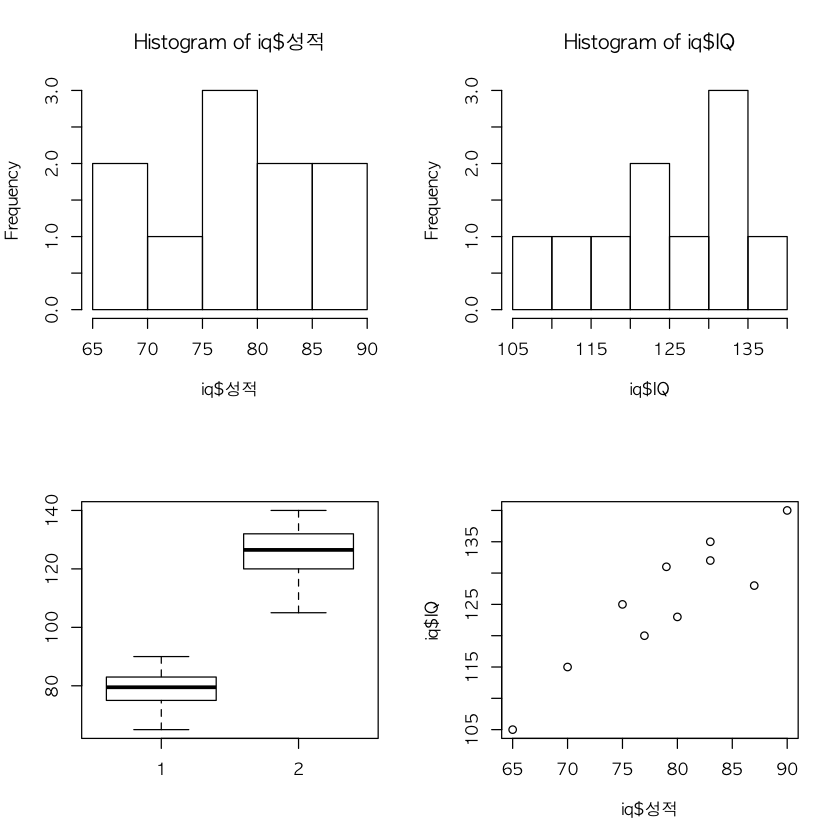

In [41]:
# IQ가 126인 사람의 성적을 예측해 보시오
options(warn=-1)
par(mfrow = c(2,2), bg='white' , family="AppleGothic")
hist(iq$성적)
hist(iq$IQ)
boxplot(iq$성적, iq$IQ)
plot(iq$성적, iq$IQ)

In [42]:
cor(iq$성적, iq$IQ)

[1] 0.9102242

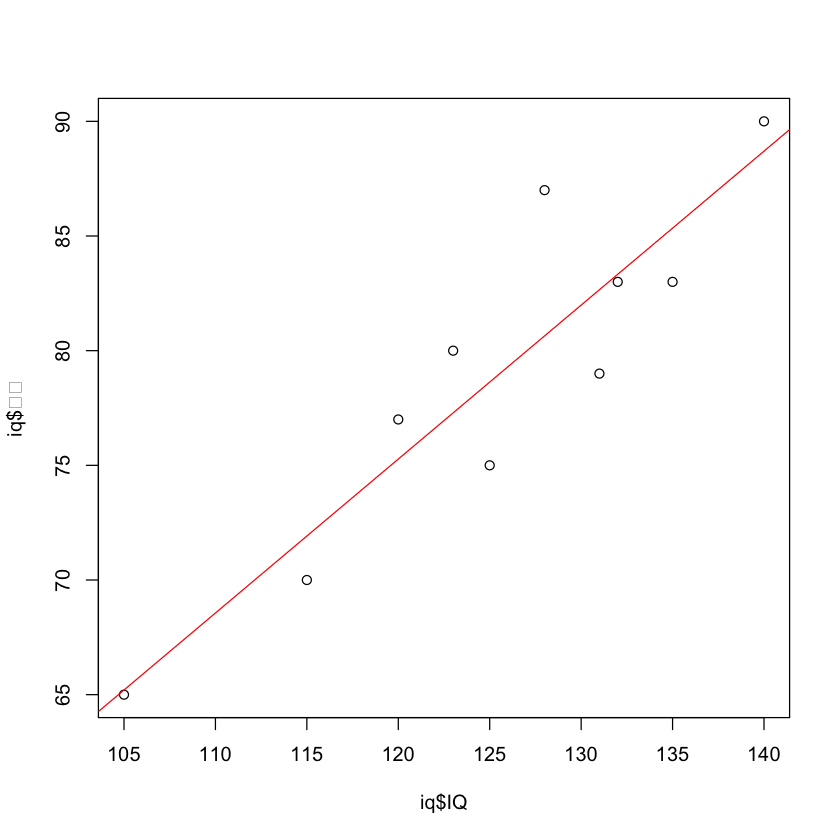

In [43]:
par(bg='white' , family="AppleGothic")
plot(iq$성적~ iq$IQ)

# 회귀선 (중심선, 평균선)
r <- lm(iq$성적~ iq$IQ) # 수식 
abline(r, col='red')

In [45]:
# 분석 결과

summary(r)

# 회귀식 
r


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547



Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [48]:
# IQ가 126인 학생의 성정 예측범위 
## (Intercept) , iq$IQ  예측 정도에 최소 . 이 붙어 있어야 사용할 수 있다. 
## 아무 표시가 없으면 데이터를 망가뜨릴 수도 있는 값이다
0.6714 * 126 
cat(0.6714 * 126 - 3.322, "~", 0.6714 * 126  + 3.322 ,'\n')

[1] 84.5964

81.2744 ~ 87.9184 


In [69]:
# 성적과 가장 관련이 깊은 항목은?
head(iq)
cor(iq$성적, iq$IQ) # 0.910224243842902
cor(iq$성적, iq$다니는.학원수) # 0.78405144055891
cor(iq$성적, iq$게임하는.시간) # -0.338354944603278
cor(iq$성적, iq$TV시청.시간) # -0.847333322809918

cor(iq[-(1:2)] ,iq$성적) # 성적과 연관을 한번에

cor(iq[-1]) # 전체를 한번에



이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

IQ,0.9102242
다니는.학원수,0.7840514
게임하는.시간,-0.3383549
TV시청.시간,-0.8473333


,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000



Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264



Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
    -7.8916       0.1241  


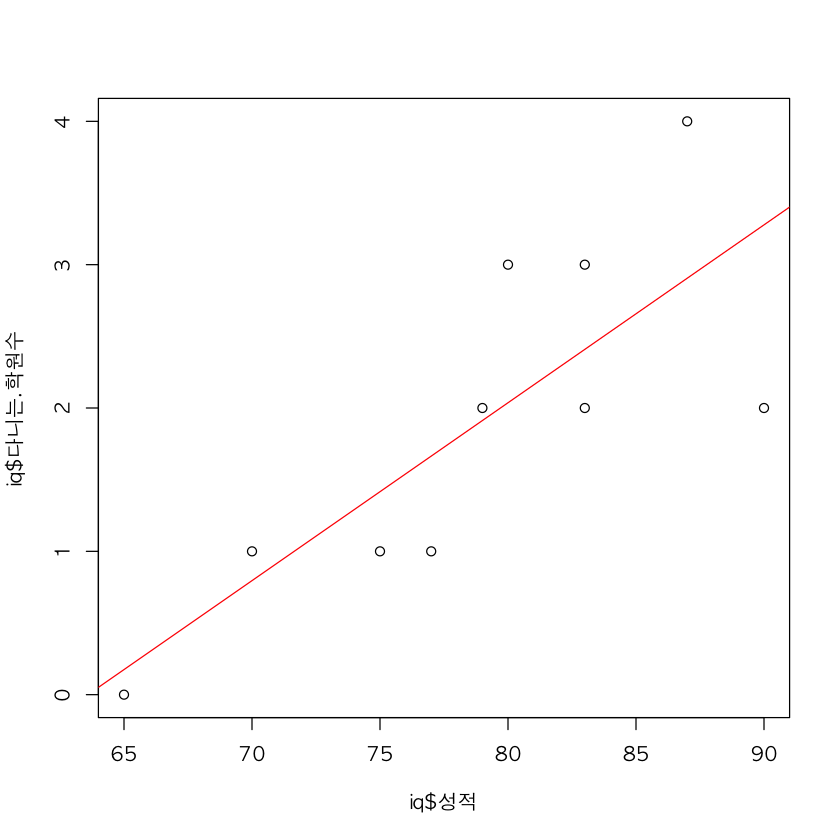

In [68]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?

par(bg='white' , family="AppleGothic")
plot(iq$다니는.학원수 ~ iq$성적)

# 회귀선 (중심선, 평균선)
r <- lm(iq$다니는.학원수 ~ iq$성적) # 수식 y,x 순서대로 써줘야 한다
abline(r, col='red')

# 분석 결과
summary(r)

# 회귀식 
r

In [63]:
# y =   0.1241  x + -7.8916 +- 0.7882
0.1241 * 90 + -7.8916 - 0.7882 , "~" , 0.1241 * 90 + -7.8916 + 0.7882

[1] 2.4892

[1] 4.0656


Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4884 -3.8372 -0.8721  2.0581 10.6047 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.488      3.069  22.642 1.53e-08 ***
iq$다니는.학원수    4.953      1.386   3.573  0.00726 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264



Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Coefficients:
     (Intercept)  iq$다니는.학원수  
          69.488             4.953  


[1] 3.135877

[1] 5.14678

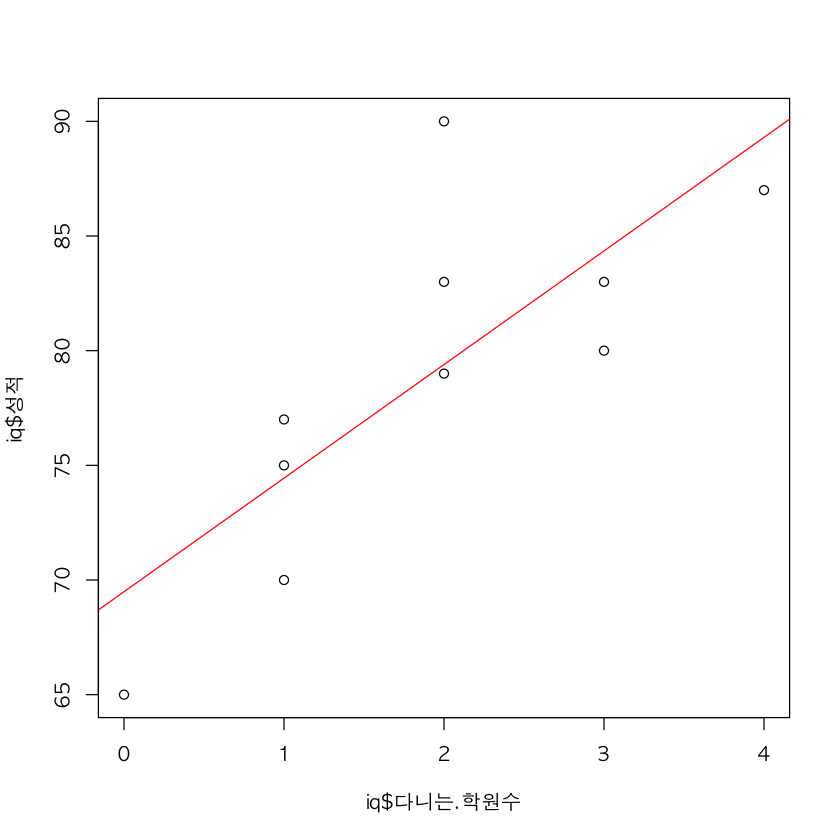

In [70]:
### 이렇게 하면 안됨 통계와 수학은 다르다. y를 넘겨서 계산하는것이 아니라 y는 타겟, x는 피쳐 로 지정하고 시작해야한다.@@@
par(bg='white' , family="AppleGothic")
plot(iq$성적 ~ iq$다니는.학원수)

# 회귀선 (중심선, 평균선)
r <- lm(iq$성적 ~ iq$다니는.학원수) # 수식 
abline(r, col='red')

# 분석 결과
summary(r)

# 회귀식 
r

# y (90) =  4.953 x + 69.488 +- 4.98 -90
# x = (-90 + 69.488 + 4.98) / -4.953
(-90 + 69.488 + 4.98) / -4.953
(-90 + 69.488 - 4.98) / -4.953

[1] 0.9102242


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547



Call:
lm(formula = iq$IQ ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
     28.035        1.234  


예측 IQ :  128.421 ~ 137.429

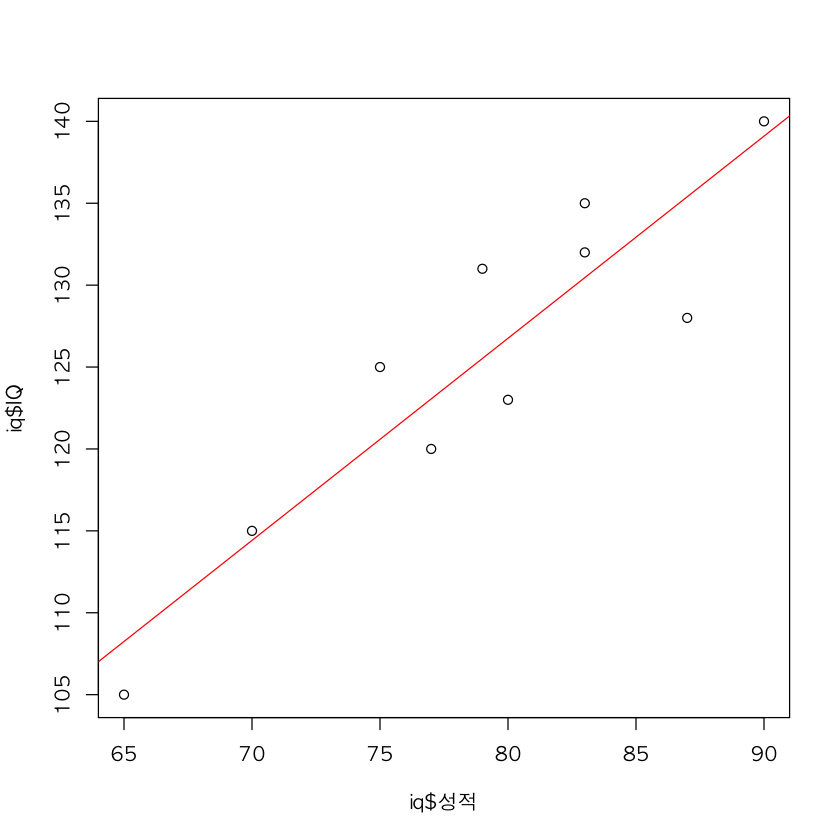

In [83]:
# 성적이 85점이라면 IQ는 얼마일까?
cor(iq$성적, iq$IQ)

par(bg='white' , family="AppleGothic")
plot(iq$IQ ~ iq$성적)

# 회귀선 (중심선, 평균선)
r <- lm(iq$IQ ~ iq$성적) # 수식 
abline(r, col='red')

# 분석 결과
summary(r)

# 회귀식 
r
# y 절편 이 아무 표시가 없지만 예측 값이 이상할때 y 절편 값을 보고 넣을지 말지를 판단해야한다.
# y = ax + b
cat("예측 IQ : ", 1.234 * 85 + 28.035 - 4.504, "~", 1.234 * 85 + 28.035 + 4.504)

---
## 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 예측하는 방법

attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개 부서(무작위) 약 35명을 대상으로 한 설문지 데이터 
- 각 수치는 각 부서의 7개 질문에 대한 점수를 나타낸다.

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


,rating,complaints,privileges,learning,raises,critical,advance
25,63,54,42,48,66,75,33
26,66,77,66,63,88,76,72
27,78,75,58,74,80,78,49
28,48,57,44,45,51,83,38
29,85,85,71,71,77,74,55
30,82,82,39,59,64,78,39


'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

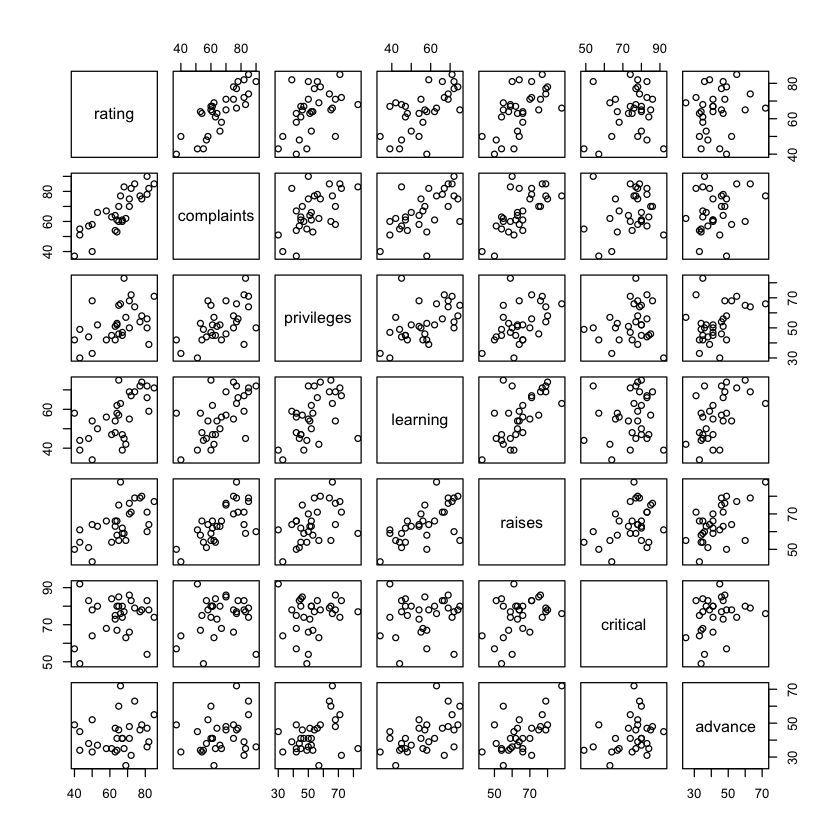

In [91]:
head(attitude)
tail(attitude)
str(attitude)
summary(attitude)

par(bg='white')
plot(attitude)


In [96]:
# 회귀분석
lm(rating ~ complaints + privileges + learning + raises + critical + advance , data = attitude)

model <- lm(rating ~ . , data = attitude) # . : 앞에 써있는 컬럼 빼고 컬럼 전부 다 ; 머신러닝에서도 많이 쓰임

# rating = 0.61319 * complaints + -0.07305 * privileges + ... +- 10.78708


Call:
lm(formula = rating ~ complaints + privileges + learning + raises + 
    critical + advance, data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [98]:
# model 검토 
summary(model)  # com , lea빼고 관계도가 높지 않다
# 모든 컬럼을 넣었을때 예측력 Adjusted R-squared:  0.6628
cor(attitude) # com , lea빼고 관계도가 높지 않다


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [102]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward") # backward 필요없는거 제거하는 방법, 딥러닝에서도 사용
summary(reduced) # 컬럼을 제거하고 난 후 예측력 Adjusted R-squared:  0.6864
reduced # 이걸로 분석하면 된다.

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08



Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


## iris에 대한 다중 회귀 분석 
타겟 : species


Call:
lm(formula = Species ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411,0.7825612
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259,-0.4266576
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654,0.9490347
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000,0.9565473
Species,0.7825612,-0.4266576,0.9490347,0.9565473,1.0000000


Start:  AIC=-450.56
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
Species ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38



Call:
lm(formula = Species ~ Sepal.Length + Petal.Length + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16



Call:
lm(formula = Species ~ Sepal.Length + Petal.Length + Petal.Width, 
    data = iris)

Coefficients:
 (Intercept)  Sepal.Length  Petal.Length   Petal.Width  
      1.1447       -0.1362        0.2521        0.5869  


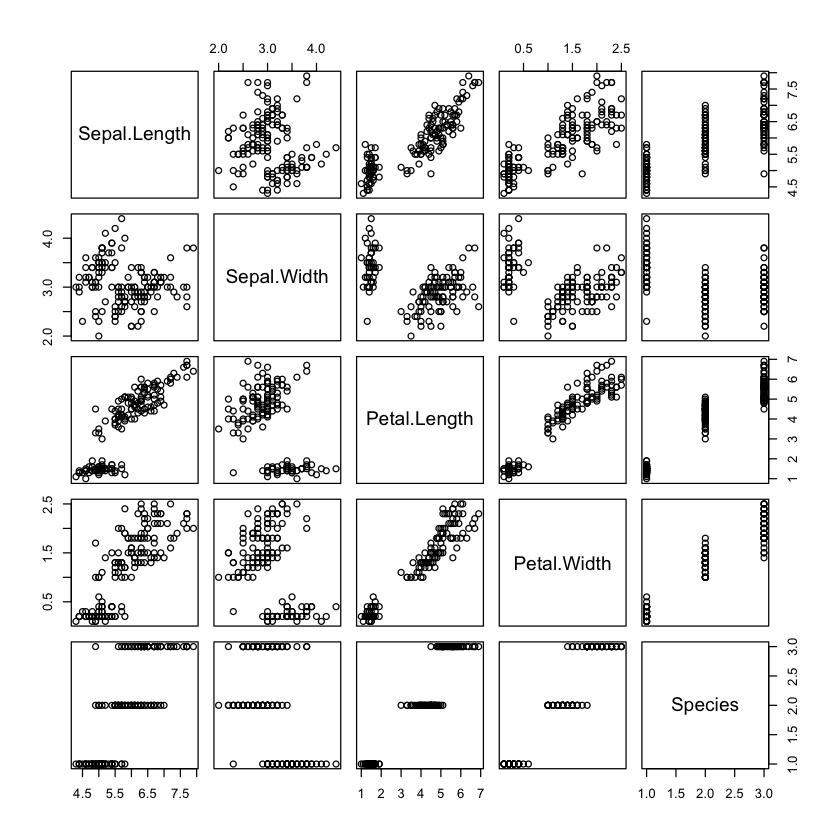

In [111]:
par(bg='white')
plot(iris)
iris$Species <- as.numeric(iris$Species) # factor변환 - 숫자로 변환해줘야 한다!! 

model <- lm(Species ~ . , data = iris)
summary(model)  # Sepal.Width의 관계도가 높지 않다
# 모든 컬럼을 넣었을때 예측력 Adjusted R-squared:  0.9285 
cor(iris)

# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward") 
summary(reduced) # Sepal.Width 컬럼을 제거하고 난 후 Adjusted R-squared:  0.9287 
reduced 

> 끗